In [13]:
!pip install nsepy


import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [14]:
df = yf.download("RELIANCE.NS", start="2015-01-01", end="2024-12-31")
df = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()


/tmp/ipython-input-14-3780315171.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("RELIANCE.NS", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [15]:
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['Target'] = df['Close'].shift(-1)
df.dropna(inplace=True)

In [16]:
X = df.drop('Target', axis=1)
y = df['Target']


/tmp/ipython-input-16-355442960.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = df.drop('Target', axis=1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [18]:
#training of models
gbr = GradientBoostingRegressor()
ada = AdaBoostRegressor()
rf = RandomForestRegressor()

In [19]:
gbr.fit(X_train, y_train)
ada.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
#stacked ensemble
stacked = StackingRegressor(
    estimators=[('gbr', gbr), ('ada', ada), ('rf', rf)],
    final_estimator=LinearRegression()
)
stacked.fit(X_train, y_train)
pred_stack = stacked.predict(X_test)

In [22]:
r2_stacked = r2_score(y_test, pred_stack)

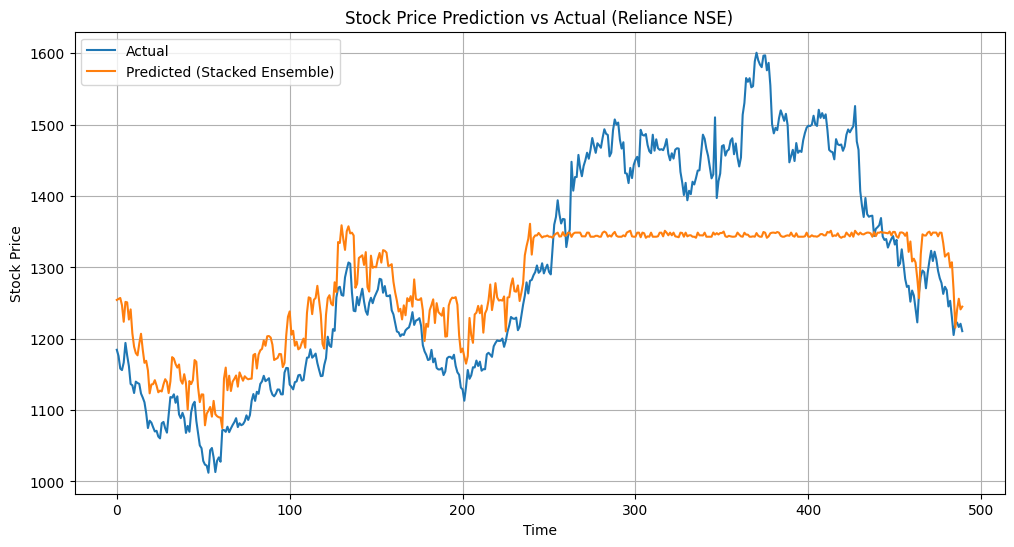

In [23]:
#visualizations

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(pred_stack, label='Predicted (Stacked Ensemble)')
plt.legend()
plt.title("Stock Price Prediction vs Actual (Reliance NSE)")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.grid(True)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [25]:
r2 = r2_score(y_test, pred_stack)

In [26]:
#MAE and RSME
mae = mean_absolute_error(y_test, pred_stack)
rmse = np.sqrt(mean_squared_error(y_test, pred_stack))

In [28]:
print(f"📊 Model Evaluation Metrics (Stacked Regressor):")
print(f"✅ R² Score       : {r2:.4f}")
print(f"✅ MAE            : {mae:.4f}")
print(f"✅ RMSE           : {rmse:.4f}")

📊 Model Evaluation Metrics (Stacked Regressor):
✅ R² Score       : 0.6330
✅ MAE            : 79.1282
✅ RMSE           : 92.9097
